### Import the required modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder ,StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

### Import the data

In [5]:
## Import required dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\train.csv")

In [6]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [7]:
# Statistical Info
df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [8]:
# Data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
# Find unique values
df.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64





### Exploratory Data Analysis

In [10]:
## Univariate Analysis

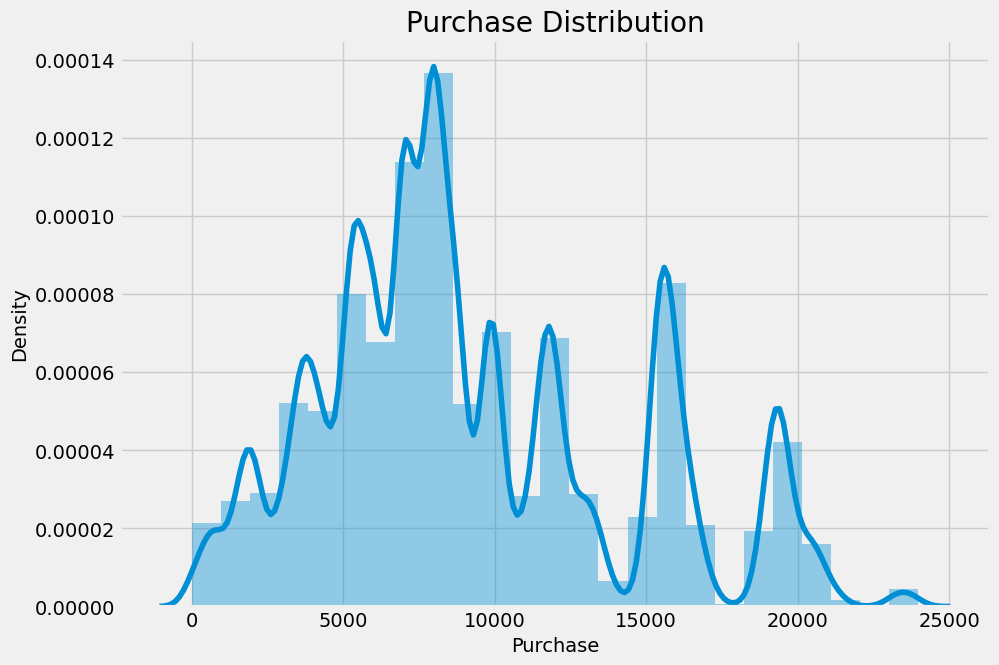

In [11]:
## Distplot for Purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
sns.distplot(x=df['Purchase'],bins=25)
plt.title("Purchase Distribution")
plt.xlabel("Purchase")
plt.ylabel("Density")
plt.show()

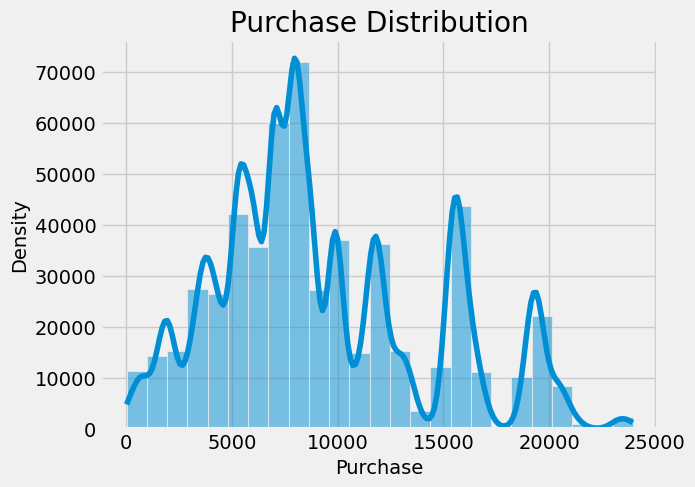

In [12]:
sns.histplot(x='Purchase',data=df,kde=True,bins=25)
plt.title("Purchase Distribution")
plt.xlabel("Purchase")
plt.ylabel("Density")
plt.show()

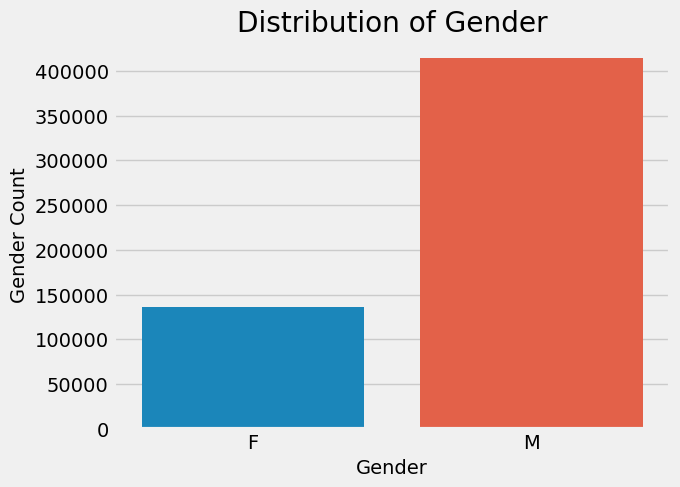

In [13]:
sns.countplot(x='Gender',data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Gender Count")
plt.show()

<Axes: xlabel='Age', ylabel='count'>

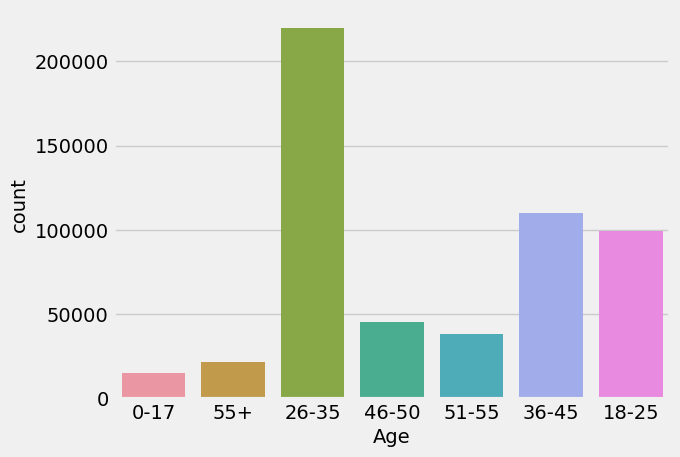

In [14]:
## DIstribution of Age Group
sns.countplot(x='Age',data=df)

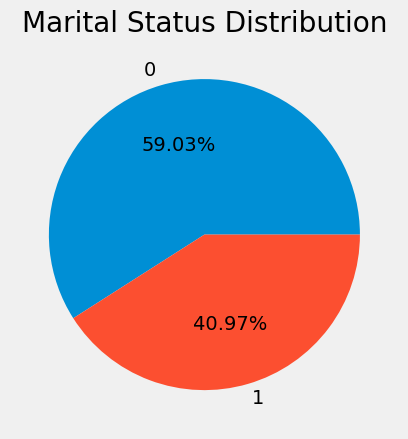

In [15]:
plt.pie(x=df.Marital_Status.value_counts(),labels=df.Marital_Status.value_counts().index, autopct='%0.2f%%')
plt.title("Marital Status Distribution")
plt.show()

<Axes: xlabel='count', ylabel='Occupation'>

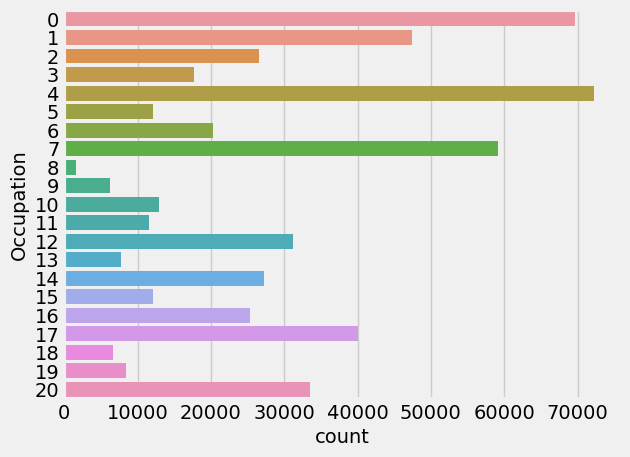

In [16]:
sns.countplot(y='Occupation',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

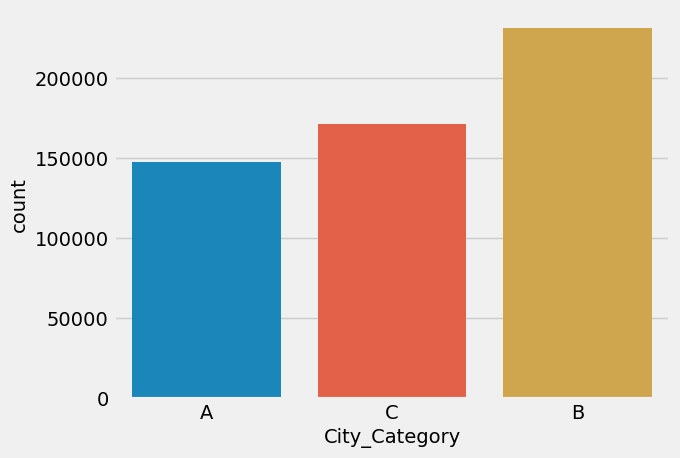

In [17]:
sns.countplot(x='City_Category',data=df)

In [18]:
# sns.pairplot(df)

In [19]:
### Bivariate analysis 

<Axes: xlabel='Age', ylabel='Product_Category_1'>

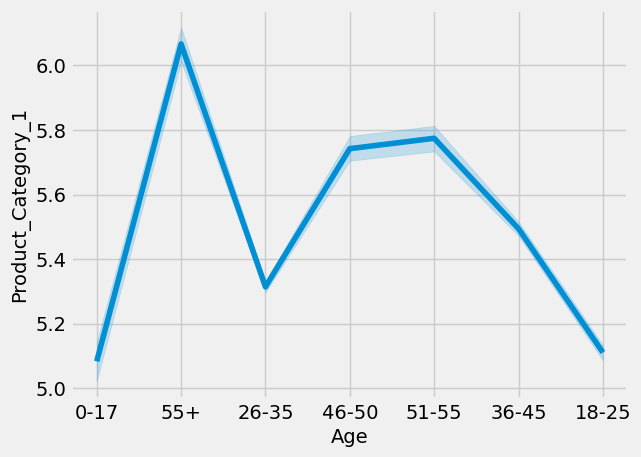

In [20]:
sns.lineplot(x='Age',y='Product_Category_1',data=df)

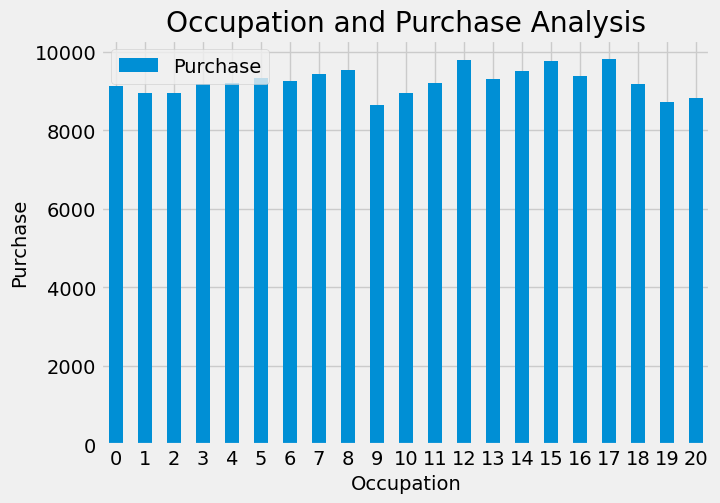

In [21]:
Occupation_plt = df.pivot_table(index='Occupation',values='Purchase',aggfunc=np.mean)
Occupation_plt.plot(kind='bar',figsize=(7,5))
plt.title("Occupation and Purchase Analysis")
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.show()

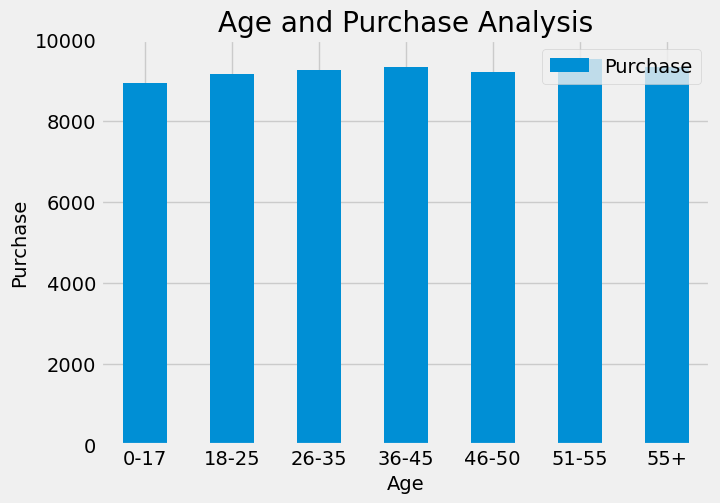

In [22]:
Occupation_plt = df.pivot_table(index='Age',values='Purchase',aggfunc=np.mean)
Occupation_plt.plot(kind='bar',figsize=(7,5))
plt.title("Age and Purchase Analysis")
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.show()

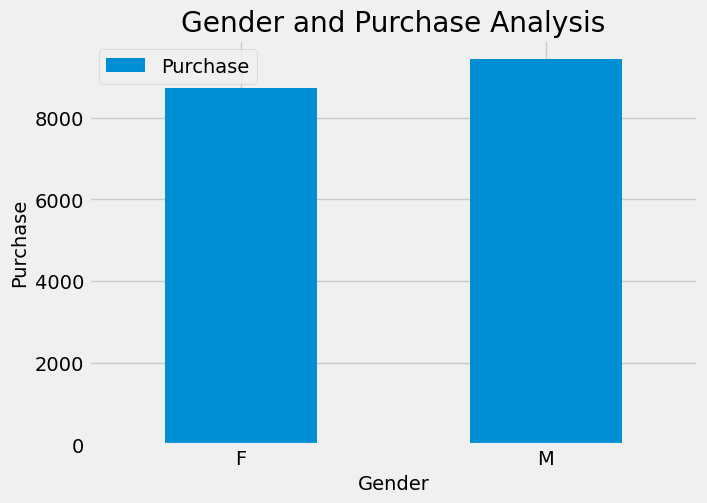

In [23]:
Occupation_plt = df.pivot_table(index='Gender',values='Purchase',aggfunc=np.mean)
Occupation_plt.plot(kind='bar',figsize=(7,5))
plt.title("Gender and Purchase Analysis")
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.xticks(rotation=0)
plt.show()

 ### Preprocessing the Data 

In [24]:
## Check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [25]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [26]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(8.0)

In [27]:
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [28]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(16.0)

In [29]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Correlation Metrix

<Axes: >

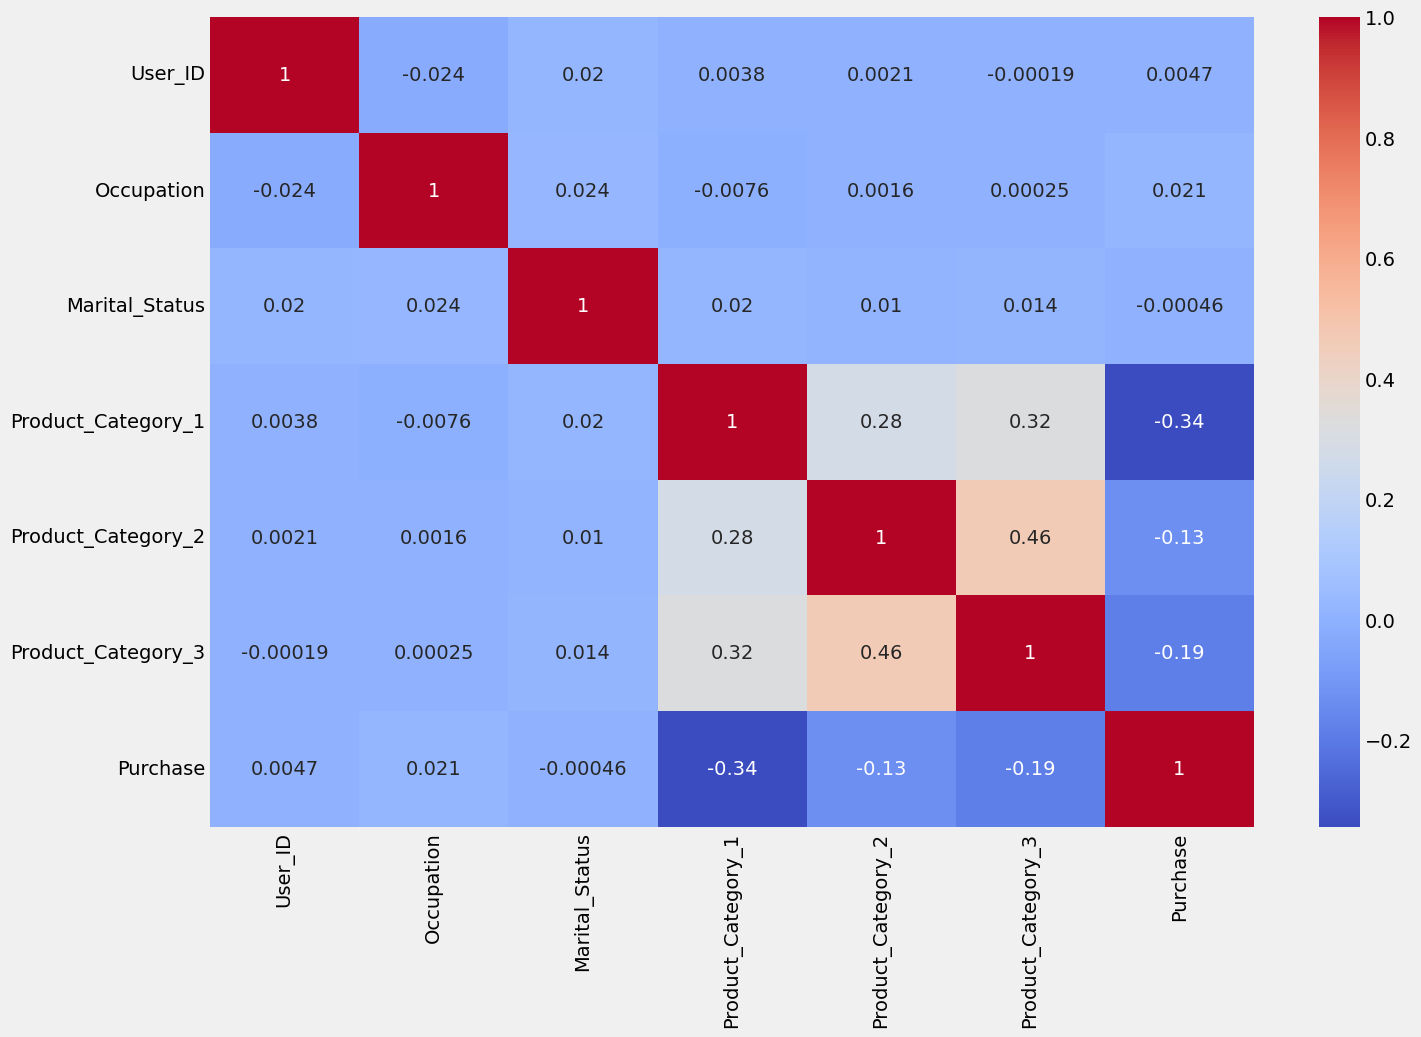

In [30]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

### Train Test Split

In [31]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [32]:
df = pd.get_dummies(df)

In [33]:
df.head()

Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0          10               0                   3                 8.0   
1          10               0                   1                 6.0   
2          10               0                  12                 8.0   
3          10               0                  12                14.0   
4          16               0                   8                 8.0   

   Product_Category_3  Purchase  Gender_F  Gender_M  Age_0-17  Age_18-25  ...  \
0                16.0      8370         1         0         1          0  ...   
1                14.0     15200         1         0         1          0  ...   
2                16.0      1422         1         0         1          0  ...   
3                16.0      1057         1         0         1          0  ...   
4                16.0      7969         0         1         0          0  ...   

   Age_51-55  Age_55+  City_Category_A  City_Category_B  City_Category_C  \
0          0        0                1                0                0   
1          0        0                1                0                0   
2          0        0                1                0                0   
3          0        0                1                0                0   
4          0        1                0                0                1   

   Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                             1                             0   
1                             1                             0   
2                             1                             0   
3                             1                             0   
4                             0                             0   

   Stay_In_Current_City_Years_4+  
0                              0  
1                              0  
2                              0  
3                              0  
4                              1  

[5 rows x 23 columns]

In [34]:
x = df.drop('Purchase',axis=1)
y = df['Purchase']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

### Model Training

In [36]:
model = LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(x_test)

In [39]:
y_pred

array([11961.125, 10493.875,  7372.   , ...,  9135.75 ,  7439.875,
       10466.25 ])

In [40]:
MAE = sm.mean_absolute_error(y_test,y_pred)
MSE = sm.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2_Score = r2_score(y_test,y_pred)

In [41]:
print(f"Mean Absolute Error : {MAE}")
print(f"Mean Squared Error : {MSE}")
print(f"Root Mean Squared Error : {RMSE}")
print(f"R2 Score : {R2_Score}")

Mean Absolute Error : 3575.354849764029
Mean Squared Error : 21878787.060645796
Root Mean Squared Error : 4677.476569759147
R2 Score : 0.13020826218192116


In [42]:
print(model.coef_)

[ 7.11524589e+00 -6.96215320e+01 -4.03839104e+02 -2.20267627e+00
 -1.54576089e+02 -2.96550859e+12 -2.96550859e+12 -4.12438532e+14
 -4.12438532e+14 -4.12438532e+14 -4.12438532e+14 -4.12438532e+14
 -4.12438532e+14 -4.12438532e+14 -3.91942346e+14 -3.91942346e+14
 -3.91942346e+14 -9.36871733e+13 -9.36871733e+13 -9.36871733e+13
 -9.36871733e+13 -9.36871733e+13]


In [43]:
print(model.intercept_)

901033559277687.4


### Tunning

In [44]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel

In [45]:
linear_model = LinearRegression()
linear_score = cross_val_score(linear_model,x_train,y_train,cv=5)

In [46]:
ridge_model = Ridge(alpha=0.75)
ridge_score = cross_val_score(ridge_model,x_train,y_train,cv=6)

In [47]:
lasso_model = Lasso(alpha=0.75)
lasso_score = cross_val_score(lasso_model,x_train,y_train,cv=5)

In [48]:
linear_model.fit(x_train,y_train)
lr_predicted = linear_model.predict(x_test)
lr_mae = mean_absolute_error(y_test,lr_predicted)
lr_mse = mean_squared_error(y_test,lr_predicted)
lr_r2 = r2_score(y_test,lr_predicted)

In [49]:
print(f"Linear MAE : {lr_mae}")
print(f"Linear MSE : {lr_mse}")
print(f"Linear R2 : {lr_r2}")

Linear MAE : 3575.354849764029
Linear MSE : 21878787.060645796
Linear R2 : 0.13020826218192116


In [50]:
lasso_model.fit(x_train,y_train)
lasso_predicted = linear_model.predict(x_test)
lasso_mae = mean_absolute_error(y_test,lasso_predicted)
lasso_mse = mean_squared_error(y_test,lasso_predicted)
lasso_r2 = r2_score(y_test,lasso_predicted) 

In [51]:
print(f"Lasso MAE : {lasso_mae}")
print(f"Lasso MSE : {lasso_mse}")
print(f"Lasso R2 : {lasso_r2}")

Lasso MAE : 3575.354849764029
Lasso MSE : 21878787.060645796
Lasso R2 : 0.13020826218192116


In [52]:
ridge_model.fit(x_train,y_train)
ridge_predicted = linear_model.predict(x_test)
ridge_mae = mean_absolute_error(y_test,ridge_predicted)
ridge_mse = mean_squared_error(y_test,ridge_predicted)
ridge_r2 = r2_score(y_test,ridge_predicted)

In [53]:
print(f"Ridge MAE : {ridge_mae}")
print(f"Ridge MSE : {ridge_mse}")
print(f"Ridge R2 : {ridge_r2}")

Ridge MAE : 3575.354849764029
Ridge MSE : 21878787.060645796
Ridge R2 : 0.13020826218192116


In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBRegressor

In [56]:
regressor = XGBRegressor()

In [57]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
y_predxg = regressor.predict(x_test)

In [59]:
y_predxg

array([15543.015 , 13448.952 ,  7140.594 , ...,  5682.002 ,  5193.0747,
       14054.295 ], dtype=float32)

In [60]:
MAE = sm.mean_absolute_error(y_test,y_predxg)
MSE = sm.mean_squared_error(y_test,y_predxg)
RMSE = np.sqrt(MSE)
R2_Score = r2_score(y_test,y_predxg)

In [61]:
print(f"Mean Absolute Error : {MAE}")
print(f"Mean Squared Error : {MSE}")
print(f"Root Mean Squared Error : {RMSE}")
print(f"R2 Score : {R2_Score}")

Mean Absolute Error : 2160.1258519402504
Mean Squared Error : 8367240.9385257345
Root Mean Squared Error : 2892.6183534171482
R2 Score : 0.6673601230045496


In [62]:
pi4p install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [63]:
from pandas_profiling import ProfileReport

In [64]:
profile = ProfileReport(df, title="Black Friday Sale Profiling Report")

In [65]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]